## Data Cleaning & EDA

### Our Business Problem

We have been approached by a housing development company to assist them with identifying where they should develop their new developement project in the King County district. Our client is looking to develop homes in areas that are most profitable, as they are looking to raise their capital. As a result, we will analyze which cities and areas within the King Country district sell homes for the highest prices, as well as identify which features of these homes increase the value of the properties. By the end of our analysis, we hope to provide recomemndations on which area our client should build in, as well as which types of homes will yield them the highest profits. 

We will start our task with EDA by importing, cleaning, and exploring our data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import Data into a data frame and preview 
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#Explore the data frame, see how many records, what data types, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
#Display some sample statistics and look for outliers 

desc_df = df.describe()

#add std metric at the bottom to look for outliers that 3 stds away from the mean
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

desc_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
+3_std,1.321068e+10,1.642401e+06,6.152097,4.422779,4834.640225,1.393373e+05,3.113145,0.268070,2.530921,5.361462,11.177514,4271.876126,2059.125378,1283.476020,98238.491062,47.975748,-121.791812,4042.311733,94581.609363
-3_std,-4.049733e+09,-5.618078e+05,0.594303,-0.191127,-673.996525,-1.091385e+05,-0.124952,-0.252879,-2.063196,1.458189,4.138316,-694.682441,1882.873973,-1116.202463,97917.412628,47.144438,-122.636153,-69.071098,-69065.042340


In [5]:
#Look for null values in each column
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

For waterfront, view, and yr_renovated, we see that up to 75% of the distribution still remains at a value of 0. As a result, we have decided to fill the NA values in these columns with 0. 

In [6]:
#Replace null values and "nan" with 0

df = df.replace("nan","0")

col = ['waterfront', 'view', 'yr_renovated']

for name in col:
    df[name] = df[name].fillna(value=0)

In [7]:
#Double check for missing values in each column
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Before we proceed, we will quickly check if there are any duplicate rows in our dataset.

In [8]:
#Check for duplicates
df_duplicates = df[df.duplicated()]
print(len(df_duplicates))
display(df_duplicates)

0


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [9]:
#Check for duplicated IDs 
duplicated_ids = df.duplicated(subset=['id'], keep=False)
duplicated_ids.value_counts()

False    21244
True       353
dtype: int64

In [10]:
#Explore duplicated IDs
df_duplicated_ids = df[duplicated_ids]
df_duplicated_ids.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,0.0,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460


In [11]:
#Drop the duplicates and keep the latest sale of each property
df.drop_duplicates(subset=['id'], keep='last', inplace=True)
print(df.shape)

(21420, 21)


A home's latitude and longitude will not be particularly relevant for prospective homebuyers. Neither will its id, or the date, as other data, such as yr_built, will be of much more interest. As a result, we will drop these variables, as they do not make much sense in the context of our business problem.

In [12]:
#Remove features/columns that are of no interest for this analysis 
df.drop(['id', 'date','lat','long'], axis=1, inplace=True)

We have also identified several non-numeric values within the feature "sqft_basement". We will replace these values with 0 and then convert this feature into a numeric column.

In [13]:
#Turn the sqft column into a numeric column

df.sqft_basement = df.sqft_basement.str.replace("?",'0.0')
df.sqft_basement = pd.to_numeric(df['sqft_basement'])

In [14]:
#double check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 17 columns):
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       21420 non-null float64
view             21420 non-null float64
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
sqft_basement    21420 non-null float64
yr_built         21420 non-null int64
yr_renovated     21420 non-null float64
zipcode          21420 non-null int64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
dtypes: float64(7), int64(10)
memory usage: 2.9 MB


## Preview Distribution of Each Column

Before we conduct any transformations, we need to check the distributions in order to identify categorical variables and see if/which features are normally distributed.

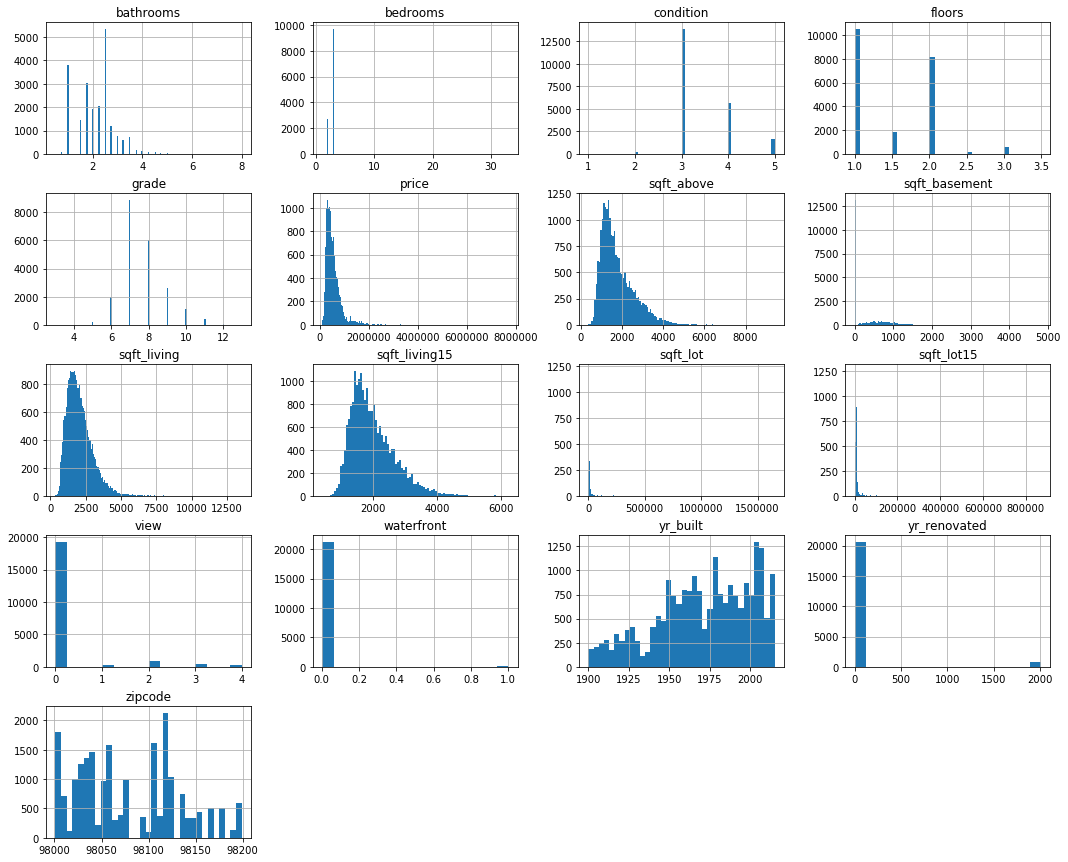

In [15]:
#First, let's plot a histogram for each column
df.hist(figsize=(18,15), bins='auto');

Clearly, bathrooms, bedrooms, condition, floors, grade, view, waterfront, and yr_renovated are categorical. The remaining variables seem to be continuous. Let's explore this further by creating some scatter plots.

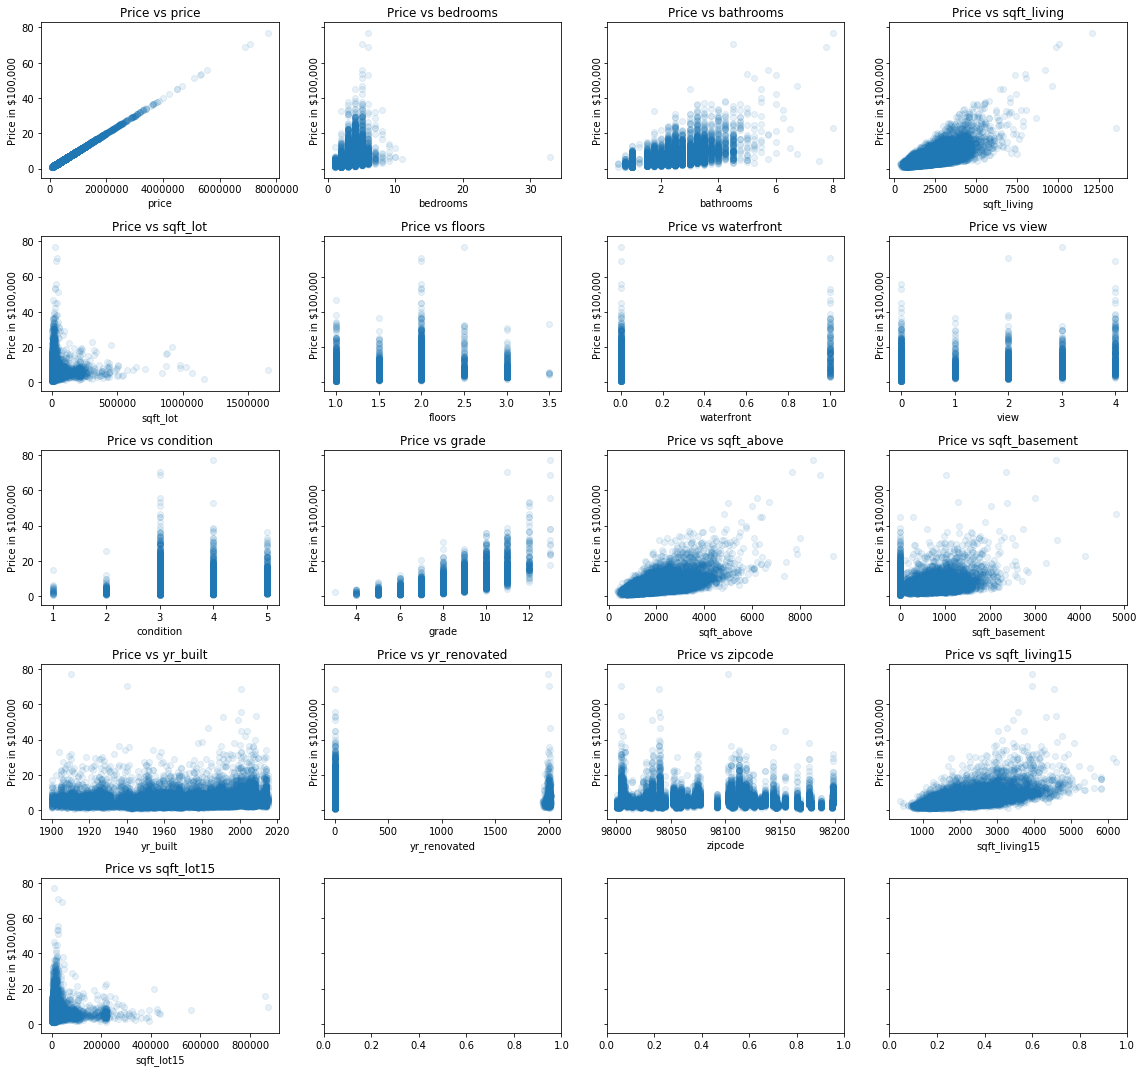

In [16]:
#Next, let's plot scatter plots that will further help us identify outliers and categorical variables 
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), df.columns):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price in $100,000')

fig.tight_layout()

These scatter plots helped confirm which variables are categorical and which are continuous. We have identified our continuous variables, sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built, sqft_living15 and sqft_lot15, and later we will look to transform some of these variables, since many of them currently do not appear to follow a normal distribution.

#### Preview Correlation

Our next logical step would be to investigate correlation amongst variables. First we will look at this more generally, then we will narrow our results to variables that are more highly correlated with our y-variable, price.

In [17]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.309640,0.525215,0.701295,0.088789,0.254972,0.264915,0.392787,0.034219,0.666835,0.604424,0.321264,0.051012,0.118278,-0.051169,0.583792,0.082045
bedrooms,0.309640,1.000000,0.515383,0.579069,0.032490,0.177734,-0.002205,0.078353,0.025893,0.357988,0.480242,0.297093,0.155241,0.017470,-0.155061,0.394949,0.030570
bathrooms,0.525215,0.515383,1.000000,0.755522,0.087779,0.501803,0.063635,0.184949,-0.129362,0.665587,0.686328,0.278140,0.506252,0.047686,-0.203884,0.569453,0.087760
sqft_living,0.701295,0.579069,0.755522,1.000000,0.172586,0.352868,0.104737,0.280839,-0.061677,0.762477,0.876533,0.427998,0.316646,0.050851,-0.198995,0.756186,0.183837
sqft_lot,0.088789,0.032490,0.087779,0.172586,1.000000,-0.005561,0.021429,0.075360,-0.009169,0.113656,0.183210,0.014839,0.052312,0.004991,-0.129422,0.143805,0.717743
floors,0.254972,0.177734,0.501803,0.352868,-0.005561,1.000000,0.020578,0.027175,-0.266859,0.458091,0.522751,-0.242151,0.488935,0.003141,-0.058532,0.279071,-0.011367
waterfront,0.264915,-0.002205,0.063635,0.104737,0.021429,0.020578,1.000000,0.381654,0.016608,0.082905,0.071737,0.083317,-0.024842,0.074096,0.029183,0.083921,0.030653
view,0.392787,0.078353,0.184949,0.280839,0.075360,0.027175,0.381654,1.000000,0.044678,0.247632,0.165289,0.270104,-0.056171,0.089982,0.087334,0.277555,0.073381
condition,0.034219,0.025893,-0.129362,-0.061677,-0.009169,-0.266859,0.016608,0.044678,1.000000,-0.150508,-0.161483,0.168991,-0.365129,-0.056264,0.004372,-0.095256,-0.003450
grade,0.666835,0.357988,0.665587,0.762477,0.113656,0.458091,0.082905,0.247632,-0.150508,1.000000,0.756221,0.164458,0.446235,0.015744,-0.183588,0.713178,0.120056


In [18]:
#Look at which features are highly correlated with our y-variable, price.
df.corr()[abs(df.corr()['price']) > 0.3]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.309640,0.525215,0.701295,0.088789,0.254972,0.264915,0.392787,0.034219,0.666835,0.604424,0.321264,0.051012,0.118278,-0.051169,0.583792,0.082045
bedrooms,0.309640,1.000000,0.515383,0.579069,0.032490,0.177734,-0.002205,0.078353,0.025893,0.357988,0.480242,0.297093,0.155241,0.017470,-0.155061,0.394949,0.030570
bathrooms,0.525215,0.515383,1.000000,0.755522,0.087779,0.501803,0.063635,0.184949,-0.129362,0.665587,0.686328,0.278140,0.506252,0.047686,-0.203884,0.569453,0.087760
sqft_living,0.701295,0.579069,0.755522,1.000000,0.172586,0.352868,0.104737,0.280839,-0.061677,0.762477,0.876533,0.427998,0.316646,0.050851,-0.198995,0.756186,0.183837
view,0.392787,0.078353,0.184949,0.280839,0.075360,0.027175,0.381654,1.000000,0.044678,0.247632,0.165289,0.270104,-0.056171,0.089982,0.087334,0.277555,0.073381
grade,0.666835,0.357988,0.665587,0.762477,0.113656,0.458091,0.082905,0.247632,-0.150508,1.000000,0.756221,0.164458,0.446235,0.015744,-0.183588,0.713178,0.120056
sqft_above,0.604424,0.480242,0.686328,0.876533,0.183210,0.522751,0.071737,0.165289,-0.161483,0.756221,1.000000,-0.051707,0.422977,0.020078,-0.260803,0.731887,0.194445
sqft_basement,0.321264,0.297093,0.278140,0.427998,0.014839,-0.242151,0.083317,0.270104,0.168991,0.164458,-0.051707,1.000000,-0.131664,0.065624,0.073769,0.198127,0.015870
sqft_living15,0.583792,0.394949,0.569453,0.756186,0.143805,0.279071,0.083921,0.277555,-0.095256,0.713178,0.731887,0.198127,0.324715,0.000812,-0.278428,1.000000,0.182765


We should also look at variables to see if they are correlated with each other, in order to investigate potential multicollinearity.

In [19]:
df2 = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df2['pairs'] = list(zip(df2.level_0, df2.level_1))

df2.set_index(['pairs'], inplace = True)

df2.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df2.columns = ['cc']

df2.drop_duplicates(inplace=True)

df2[(df2.cc>.75) & (df2.cc<1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876533
"(grade, sqft_living)",0.762477
"(grade, sqft_above)",0.756221
"(sqft_living15, sqft_living)",0.756186
"(sqft_living, bathrooms)",0.755522


We see here that several variable-pairs are correlated with one another. We will consider dropping variables that are highly correlated with one another in order to prevent multicollinearity in our model.

### Binning Features

For categorical variables that contain many values, it will make more sense to bin these features before we convert them into dummy variables. Before we apply this technique to various features in our dataset, let's start by exploring how we would bin the feature "yr_renovated" into binned categories.

In [20]:
#We will begin by looking at yr_renovated and determine how to manipulate this variable
df.yr_renovated.sort_values().unique()

array([   0., 1934., 1940., 1944., 1945., 1946., 1948., 1950., 1951.,
       1953., 1954., 1955., 1956., 1957., 1958., 1959., 1960., 1962.,
       1963., 1964., 1965., 1967., 1968., 1969., 1970., 1971., 1972.,
       1973., 1974., 1975., 1976., 1977., 1978., 1979., 1980., 1981.,
       1982., 1983., 1984., 1985., 1986., 1987., 1988., 1989., 1990.,
       1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998., 1999.,
       2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
       2009., 2010., 2011., 2012., 2013., 2014., 2015.])

In [21]:
#adding a new feature "renovated" that breaks down properties that were renovated in the 2010s, 2000s, or
#not at all if they were renovated over 20 years ago. 
df['renovated'] = df['yr_renovated'].apply(lambda x: 0 if x <= 1999 else 1 if x >= 2000 and x < 2010 else 2)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,renovated
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639,0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,2720,8062,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503,0


In [22]:
#checking totals for each type of renovated unit:
df.renovated.value_counts()

0    21041
1      229
2      150
Name: renovated, dtype: int64

### Exploring Variables Further

We will now explore some of our categorical variables in more detail and determine which we would like to turn into dummy variables in our regression models.

In [23]:
#List categorical variables
categoricals = ['bedrooms', 'bathrooms', 'view', 'floors', 'waterfront', 'condition',
                'grade', 'yr_renovated', 'renovated']
categoricals

['bedrooms',
 'bathrooms',
 'view',
 'floors',
 'waterfront',
 'condition',
 'grade',
 'yr_renovated',
 'renovated']

In [24]:
#Now we will look at the variable "bedrooms" to determine whether there are any outliers, any unusual behavior, 
#and to see if there is potential to convert this into a dummy variable.
df.bedrooms.value_counts(normalize=True)

3     0.454295
4     0.319748
2     0.127731
5     0.074043
6     0.012372
1     0.008917
7     0.001774
8     0.000607
9     0.000280
10    0.000140
11    0.000047
33    0.000047
Name: bedrooms, dtype: float64

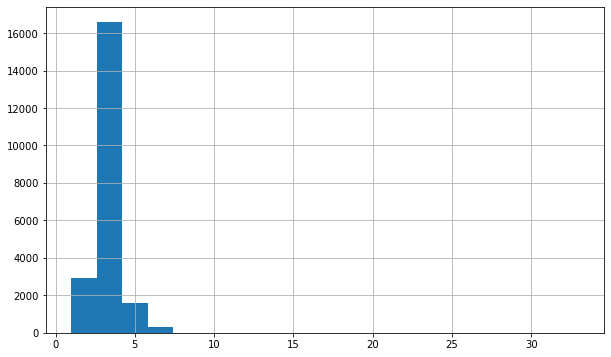

In [25]:
#Take a close up look at the histogram of bedrooms 

df['bedrooms'].hist(figsize=(10,6), bins=20)

In [26]:
#Bathrooms has some outliers as well
df.bathrooms.value_counts()

2.50    5352
1.00    3794
1.75    3020
2.25    2031
2.00    1913
1.50    1429
2.75    1182
3.00     747
3.50     729
3.25     586
3.75     155
4.00     134
4.50      99
4.25      79
0.75      70
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

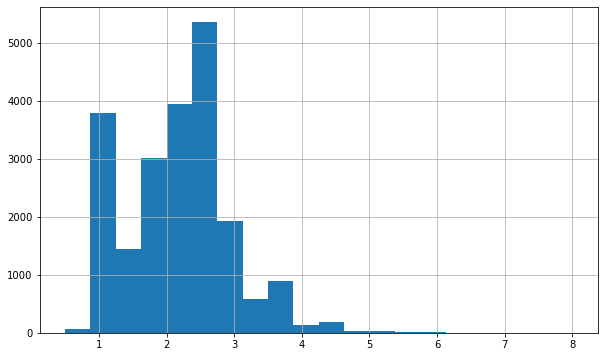

In [27]:
#Take a close up look at the histogram of bathrooms

df['bathrooms'].hist(figsize=(10,6), bins=20)

A close up look at the histograms show us that these variables will need to be transformed in some way in order to make more sense in our analysis. We will want to turn both bedrooms and bathrooms into dummy variables, in order to look at each bathroom size and each number of bedrooms as an individual column, in order to determine which of these attributes are significant when attempting to predice a home's price. 

### Some Initial Statistical EDA

We will now conduct several t-tests between features that, based on our initial correlation investigation, appear to be highly correlated with the y variable, price. 

In [28]:
from scipy import stats

In [29]:
stats.ttest_ind(df['sqft_above'], df['price'])

Ttest_indResult(statistic=-215.04743446352745, pvalue=0.0)

In [30]:
stats.ttest_ind(df['sqft_living'], df['price'])

Ttest_indResult(statistic=-214.9310543801747, pvalue=0.0)

In [31]:
stats.ttest_ind(df['sqft_living15'], df['price'])

Ttest_indResult(statistic=-214.96907948454674, pvalue=0.0)

As expected, the above t-tests all have very low p-values. We will investigate these relationships further once we build our regression models.

We will conclude our initial EDA and save our cleaned data to a new file.

In [32]:
df.to_csv('Cleaned_Data_w_Outliers')